# AMEX Default-prediction

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('train_data.csv',nrows=10000)

df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [16]:

df.columns.values

array(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2',
       'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50',
       'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11',
       'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13',
       'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15',
       'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18',
       'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21',
       'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73',
       'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
       'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10',
       'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13',
       'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18',
       'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19',
   

In [13]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 190 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    customer_ID  10000 non-null  object 
 1    S_2          10000 non-null  object 
 2    P_2          9936 non-null   float64
 3    D_39         10000 non-null  float64
 4    B_1          10000 non-null  float64
 5    B_2          10000 non-null  float64
 6    R_1          10000 non-null  float64
 7    S_3          8248 non-null   float64
 8    D_41         10000 non-null  float64
 9    B_3          10000 non-null  float64
 10   D_42         1355 non-null   float64
 11   D_43         6913 non-null   float64
 12   D_44         9505 non-null   float64
 13   B_4          10000 non-null  float64
 14   D_45         10000 non-null  float64
 15   B_5          10000 non-null  float64
 16   R_2          10000 non-null  float64
 17   D_46         7709 non-null   float64
 18   D_47         10000 non-nu

C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [17]:
df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,9936.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,8248.000000,1.000000e+04,10000.000000,1355.000000,6913.000000,9505.000000,10000.000000,10000.000000,10000.000000,10000.000000,7709.000000,10000.000000,8697.000000,1104.000000,10000.000000,10000.000000,9959.000000,4707.000000,1.000000e+04,10000.000000,10000.000000,9961.000000,9488.000000,10000.000000,2733.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,8248.000000,10000.000000,10000.000000,9703.000000,4836.000000,9.916000e+03,1.000000e+04,10000.000000,4706.000000,10000.000000,9829.000000,10000.000000,8886.000000,9987.000000,10000.000000,8574.000000,1.000000e+04,1.000000e+04,4554.000000,10000.000000,1.000000e+04,1133.000000,10000.000000,9671.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,9.679000e+03,10000.000000,9858.000000,10000.000000,9968.000000,10000.000000,10000.000000,74.000000,10000.000000,9984.000000,10000.000000,1024.000000,1.000000e+04,1.000000e+04,5306.000000,9987.000000,10000.000000,9.505000e+03,9900.000000,1.000000e+04,644.000000,1.000000e+04,9.984000e+03,10000.000000,1.000000e+04,1.000000e+04,9.963000e+03,2832.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,9679.000000,1.000000e+04,1.000000e+04,9.961000e+03,1.000000e+04,661.000000,10000.000000,10000.000000,1.000000e+04,10.0,1.000000e+04,1.000000e+04,20.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,9.999000e+03,1.000000e+04,1.000000e+04,9.961000e+03,1.000000e+04,1.000000e+04,9.740000e+03,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,9966.000000,9999.000000,9966.000000,9970.000000,9.998000e+03,9937.000000,9847.000000,9847.000000,4477.000000,1095.000000,9847.000000,10000.000000,10000.000000,1215.000000,9760.000000,10000.000000,56.000000,9998.000000,25.000000,25.000000,28.000000,9998.000000,10000.000000,7578.000000,9.706000e+03,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9.706000e+03,9706.000000,9706.000000,9800.000000,1.000000e+04,9847.000000,9847.000000,9.998000e+03,169.000000,9.847000e+03,9847.000000,1095.000000,9931.000000,10000.000000,372.000000,372.000000,372.000000,372.000000,372.000000,9.847000e+03,9.937000e+03,9.847000e+03,1572.000000,9847.000000,9.937000e+03,9.847000e+03
mean,0.650498,1.570308e-01,0.126147,0.617122,0.074035,0.227838,6.473782e-02,0.135379,0.173210,0.153766,0.127061,0.182476,0.258664,0.083084,0.049091,0.475985,0.423365,0.393777,0.162657,0.133359,0.188916,0.445520,0.166697,1.496843e-01,0.199227,0.117385,0.180476,0.603758,0.190718,0.082496,0.084599,0.112360,2.345465e-01,0.982980,3.348627e-02,0.224751,0.082667,0.337547,0.305392,0.208043,9.300645e-02,4.007032e-02,0.228412,0.086291,0.094093,0.371999,0.378087,0.446799,0.046171,0.377367,0.185423,4.300234e-02,3.663321e-01,0.704978,0.589868,1.647506e-01,0.991174,0.240391,5.072898,0.238439,5.153035e-02,2.507419e-01,4.057121e-02,9.534871e-02,0.107522,0.122721,0.080370,0.040905,0.365479,0.174337,0.146037,0.136202,0.167431,0.185016,0.125356,4

In [18]:
df.shape

(10000, 190)

In [28]:
df.isnull().sum().values

array([   0,    0,   64,    0,    0,    0,    0, 1752,    0,    0, 8645,
       3087,  495,    0,    0,    0,    0, 2291,    0, 1303, 8896,    0,
          0,   41, 5293,    0,    0,    0,   39,  512,    0, 7267,    0,
          0,    0,    0,    0, 1752,    0,    0,  297, 5164,   84,    0,
          0, 5294,    0,  171,    0, 1114,   13,    0, 1426,    0,  344,
          0,    0, 5446,    0,    0, 8867,    0,  329,    0,    0,    0,
          0,  321,    0,  142,    0,   32,    0,    0, 9926,    0,   16,
          0, 8976,    0,    0, 4694,   13,    0,  495,  100,    0, 9356,
          0,   16,    0,    0,    0,   37, 7168,    0,    0,    0,    0,
        321,    0,    0,   39,    0, 9339,    0,    0,    0, 9990,    0,
          0, 9980,    0,    0,    0,    0,    0,    1,    0,    0,   39,
          0,    0,  260,    0,    0,    0,    0,    0,    0,   34,    1,
         34,   30,    2,   63,  153,  153, 5523, 8905,  153,    0,    0,
       8785,  240,    0, 9944,    2, 9975, 9975, 99

In [30]:
[features for features in df.columns if df[features].isnull().sum()>0]

['P_2',
 'S_3',
 'D_42',
 'D_43',
 'D_44',
 'D_46',
 'D_48',
 'D_49',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_59',
 'D_61',
 'B_15',
 'D_62',
 'D_64',
 'B_17',
 'D_66',
 'D_68',
 'D_69',
 'D_70',
 'D_72',
 'D_73',
 'D_74',
 'D_76',
 'D_77',
 'B_25',
 'D_78',
 'D_79',
 'R_9',
 'D_80',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'B_29',
 'D_87',
 'D_88',
 'R_20',
 'D_89',
 'D_91',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'R_26',
 'R_27',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'B_39',
 'D_112',
 'S_27',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_128',
 'D_129',
 'B_41',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

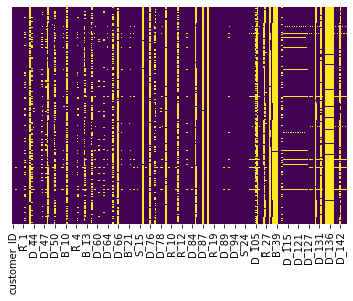

In [31]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
df.duplicated()==False


0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool